# 应用场景

所谓'近朱者赤近墨者黑'.KNN 的英文叫 K-Nearest Neighbor,作为数据挖掘中最简单的一种算法,应用也非常广泛.套用当下最流行的话题,使用KNN算法可以帮你轻松实现垃圾分类.

# 原理概念

KNN整个计算过程分为三步：  
- 计算待分类物体与其他物体之间的距离
- 统计距离最近的K个邻居
- 对于K个最近的邻居，它们属于哪个分类最多，待分类物体就属于哪一类

## K值的选取

从以上过程可以看出，KNN算法中K值的选取是关键步骤。  
若K值比较小，容易产生误差和过拟合；若K值比较大，会产生欠拟合，很多时候无法实现真正地分类。  
实际工作中，K值是实践出真知的结果，并不是事先而定的。在工程上我们一般采用交叉验证的方式选取K值。

## 距离计算

选取K值后，还有重要的计算就是关于距离的度量。两个样本点之间的距离代表了这两个样本之间的距离。距离越大，差异性越大；距离越小，差异性越小。

距离的计算方式主要有五种：**欧氏距离，曼哈顿距离,闵可夫斯基距离**,切比雪夫距离和余弦距离.其中前三种距离是KNN中最常用的.

### 欧氏距离

也叫欧几里得距离.在二维空间中,两点的欧式距离表达公式为:

$$
d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2}
$$

同样可以求两点在n维空间中的距离：

$$
d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2+...+(x_n-y_n)^2}=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}
$$

### 曼哈顿距离

立体几何中用的比较多.如下图所示,绿线代表两点之间的欧式距离,红黄蓝线代表两点的曼哈顿距离.换句话曼哈顿距离等于两点在坐标系上的绝对轴距总和,用公式表达如下:

$$
d=|x_1-y_1|+|x_2-y_2|
$$

![](./img/KNN之欧氏距离与曼哈顿距离图示.png)

### 切比雪夫距离

前面提到的欧氏距离只能直线走，而曼哈顿距离只能沿着划定的格子边缘走。而切比雪夫中说的距离则是两者的结合体（即可直线走，也可沿着格子走）。二个点之间的距离定义是其各坐标数值差绝对值的最大值。此距离中，加入了优化的成分，通过最值来定义距离。数学表达公式为:

$$
d=(|x_1-y_1|,|x_2-y_2|)
$$

### 闵可夫斯基距离

闵氏距离不是一种距离，而是一组距离的定义。对于n维空间中的两个点x(x1,x2,...xn)和y(y1,y2,...yn),闵可夫斯基距离表达公式:

$$
d=p\sqrt{\sum{_{i=1}^{n}|x_i-y_i|^p}}
$$

其中P代表空间的维数.

- 当p=1时，就是曼哈顿距离

- 当p=2时，就是欧氏距离

- 当p→∞时，就是切比雪夫距离

根据变参数的不同，闵氏距离可以表示一类的距离。

### 余弦距离

余弦距离，也称为余弦相似度，是用向量空间中两个向量夹角的余弦值作为衡量两个个体间差异的大小的度量。  
向量，是多维空间中有方向的线段，如果两个向量的方向一致，即夹角接近零，那么这两个向量就相近。而要确定两个向量方向是否一致，这就要用到余弦定理计算向量的夹角。  
余弦定理描述了三角形中任何一个夹角和三个边的关系。给定三角形的三条边，可以使用余弦定理求出三角形各个角的角度。假定三角形的三条边为a，b和c，对应的三个角为A，B和C，那么角A的余弦为：

$$
cosA=\frac{b_2+c_2-a_2}{2bc}
$$

用余弦距离表示两个向量的相似度,通过余弦公式表达为:

$$
cosθ=\frac{\sum_{i=1}^{n}(A_i×B_i)}{\sqrt{\sum_{i=1}^{n}(A_i)^2}×\sqrt{\sum_{i=1}^{n}(B_i)^2}}=\frac{A^T·B}{||A||×||B||}
$$

||A||、||B||表示向量A、B的2范数.例如向量[1,2,3]的2范数为：$\sqrt{1^2+2^2+3^2}=\sqrt{14}$

## KD树

因为KNN算法中涉及大量计算样本点之间的距离，为了减少计算次数、提升KNN搜索效率，人们提出了KD树（K-Dimenisonal）。KD树是对数据点在K维空间中划分的一种数据结构，KD树中的每个节点都K维数值点的二叉树，可以采用二叉树的增删改查操作。

KNN不仅可以做分类，还可以做回归。比如想对未知电影进行类型划分，这是一个分类问题，具体方法就是看下要分类的未知电影离它最近的K部电影大多数属于哪个分类，那这部电影就属于哪个分类。如果已知一部新电影是爱情片，想要知道它的打斗次数、接吻次数可能是多少，这就是一个回归问题。以上两个问题都可以依靠KNN算法解决。

# 工具介绍

在sklearn包中提供了KNN算法封装,当KNN做分类器的时候,需要引用:  
> from sklearn.neighbors import KNeighborsCLassifier  

当KNN做回归时,需要引用:  
> from sklearn.neighbors import KNeighborsRegressor

## KNN分类器参数介绍

构造函数   
KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30)  
- n_neighbors:即KNN中的K值,代表邻居的数量.K取值小会造成过拟合,取值大会造成欠拟合.一般默认值为5
- weights:用来确定邻居的权重,有三种方式.一是weights=uniform,代表所有邻居的权重相同;weights=distance,代表权重是距离的倒数,即与距离成反比;自定义函数,可以自定义不同距离所对应的权重
- algorithm:用来规定计算邻居的方法,有四种方式.一是algorithm=auto,根据数据的情况自动选择适合算法,为默认方式;二是algorithm=kd_tree,也叫作KD树,是多维空间的数据结构,方便对关键数据进行检索,需要注意的是KD树适用于维度少的情况,一般不超过20,否则效率反而会下降;三是algorithm=ball_tree,也叫作球树,和KD树一样是多维空间的数据结构,但适用于维度大的情况;四是algorithm=brute,也叫作暴力搜索,它和KD树不同的地方是在于采用的是线性扫描,而不是通过构造树结构进行快速检索,因此当训练集大的时候效率很低
- leaf_size:代表构造KD树或球树时的叶子树,默认为30.通过调整叶子树会影响到树的构造和搜索速度.

# 项目流程

## 问题描述

如何对手写数字进行识别分类

## 关键流程

整体训练过程大体分为三个阶段:
- 数据加载
- 准备阶段,通过数据探索对数据有个初步了解,比如样本个数,图像什么样子,识别结果怎嘛用,可以通过可视化的方式呈现;通过数据清洗,如数据规范化让数据都在同一个数量级的维度
- 分类阶段,通过训练得到分类器,然后用测试集进行准确率的计算.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

代码中,使用train_test_split做数据集的拆分,使用matplotlib.pyplot工具包显示图相关,使用accuracy_score进行分类器准确率的计算,使用preprocessing中的StandarScaler和MinMaxScaler做数据规范化.

(1797, 64)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
0


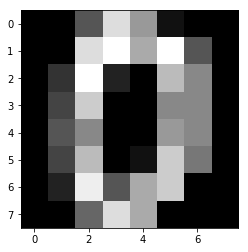

In [15]:
# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [24]:
# 分割数据,将25%的数据作为测试集,其余作为训练集(你也可以指定其他比例的数据作为训练集)
train_x, test_x, train_y, test_y = train_test_split(
    data, digits.target, test_size=0.25, random_state=33)
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)
# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
print(u'KNN 准确率:{:.4f}'.format(accuracy_score(test_y, predict_y)))

KNN 准确率:0.9756


In [46]:
# 比较各种分类器的效果
# 创建 SVM 分类器
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y=svm.predict(test_ss_x)
print('SVM 准确率: {:.4f}' .format(accuracy_score(test_y, predict_y)))
# 采用 Min-Max 规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)
# 创建 Naive Bayes 分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print(" 多项式朴素贝叶斯准确率:{:.4f}" .format(accuracy_score(test_y, predict_y)))
# 创建 CART 决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y) 
predict_y = dtc.predict(test_mm_x) 
print("CART 决策树准确率: {:.4f}".format(accuracy_score(test_y, predict_y)))


SVM 准确率: 0.9867
 多项式朴素贝叶斯准确率:0.8844
CART 决策树准确率: 0.8422


D:\YY\Anaconda\envs\Analysis\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


在数据量不大的情况下,使用sklearn还是方便的.如果数据量很大,可采用深度学习+GPU运算的方式更适合,因为深度学习的特点就是需要大量并行的重复计算,GPU最擅长的就是大量的并行计算.